# Work with spectrum data saved in a csv file

The load_csv function lets you work directly with NMR data saved in a csv file.filter

Important thing to know is that this function, unlike the load_data function that works directly with Bruker files,
you would have to declare the following parameters alongside the file path:

```bash
    - nucleus: the nucleus of the spectrum i.e. H, C, F, P, etc.
    - atomic number: the atomic number of the nucleus
    - larmor frequency: the frequency of the nucleus with respect to the magnetic field B0 in MHz
```


Peak Fitting Results:

Peak 1 (Position: 343.04 ± 5.76):
Amplitude: 0.119 ± 0.029
Width: 83.74 ± 11.29 in ppm
Width: 5677.57 ± 765.29 in Hz
Eta: 0.22 ± 0.25
Offset: 281.765 ± 1046.103
Gaussian Area: 8.26 ± 3.51
Lorentzian Area: 3.43 ± 4.01
Total Area: 11.69 ± 5.33
--------------------------------------------------

Peak 2 (Position: 432.92 ± 0.64):
Amplitude: 0.338 ± 0.028
Width: 68.71 ± 9.27 in ppm
Width: 4658.72 ± 628.44 in Hz
Eta: 1.00 ± 0.46
Offset: 41298.781 ± 624599.253
Gaussian Area: 0.00 ± 11.34
Lorentzian Area: 36.48 ± 17.70
Total Area: 36.48 ± 21.02
--------------------------------------------------

Peak 3 (Position: 551.42 ± 4.41):
Amplitude: 0.612 ± 0.062
Width: 110.12 ± 10.66 in ppm
Width: 7466.17 ± 722.60 in Hz
Eta: 0.06 ± 0.11
Offset: -9104.947 ± 46579.511
Gaussian Area: 67.63 ± 12.51
Lorentzian Area: 5.98 ± 12.01
Total Area: 73.62 ± 17.34
--------------------------------------------------

Peak 4 (Position: 600.00 ± 0.00):
Amplitude: 0.511 ± 0.099
Width: 92.34 ± 1.90 

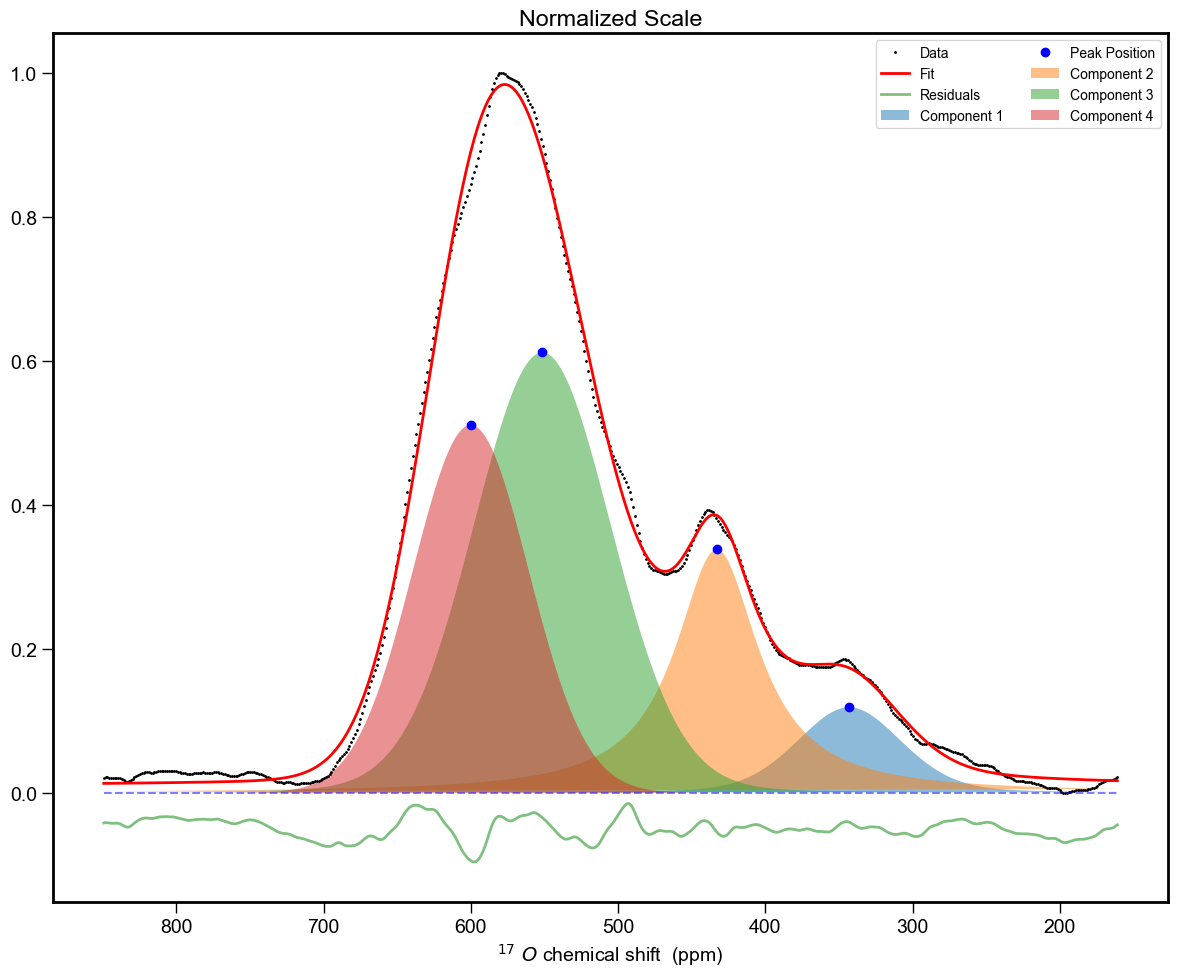

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("../../src")
from nmrlineshapeanalyser.core import NMRProcessor

# Initialize processor
processor = NMRProcessor()

# Load data
filepath = r"..\..\data\data_saved_in_csv"

processor.load_csv(filepath, '17', 'O', 67.8)	

# Select region and normalize
x_region, y_region = processor.select_region(160, 850)
x_data, y_normalized = processor.normalize_data(x_region, y_region)

# Define initial parameters for peaks
# Each peak is defined by 5 parameters in order:
# x0 (position), amplitude, width, eta (mixing parameter), offset
initial_params = [
    348, 0.16, 81, 0.89, -143.115, 
    
    435.5, 0.29, 51, 0.89, -143.115,
    
    560, 0.52, 100, 0.52, -1,
    
    600, 0.61, 82, 0.52, -1,
    
]

# Fit peaks
# fixed_x0 controls whether peak positions should be fixed during fitting
# False means position can vary, True means position is fixed
fixed_x0 = [False, False, False, True] # Allow all peak positions to vary
# popt: optimized parameters
# metrics: fitting metrics for each peak
# fitted: fitted curve data
popt, metrics, fitted = processor.fit_peaks(x_data, y_normalized, initial_params, fixed_x0)

# Plot and save results
fig, axes, components = processor.plot_results(x_data, y_normalized, fitted, popt)

# Save all results
processor.save_results(filepath, x_data, y_normalized, fitted, metrics, 
                        popt, components)